## Terceiro Trabalho de Processamento Digital de Sinais e Imagens


### Decomposição por Limiarização + Filtragem por Área

#### Alunos
Gabriel Martinelli Dias RA: 79335 </p>
Guilherme Chichanoski RA: 82174

#### Problemática 
Este trabalho consiste na relização da decomposição por limiarização que é o processo de segmentação de imagens que se baseia na diferença dos níveis de cinza que compõe diferentes objetos de uma imagem, onde a imagem pode ser segmentada em dois grupos: o grupo de pixels com níveis de cinza abaixo do limiar e o grupo de pixels com níveis de cinza acima do limiar. 

#### Método
Foi utilizado neste trabalho a versão 2.7 do Python. O precesso para a resolição do ploblema segue logo abaixo:

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lena = plt.imread("lena_std.tif")
lena_gray = lena.sum(axis=2).astype(np.float)
lena_gray *= 255/lena_gray.max()
lena_gray = lena_gray.astype(np.uint)

##### Função gen_cross
Está função recebe como parâmetro uma posição (pos) e o tamanho da imagem (shape), onde a partir deles irá realizar 

In [4]:
def gen_cross(pos, shape):
    if pos[0] != 0:
        yield (pos[0] - 1, pos[1])
    if pos[1] != 0:
        yield (pos[0], pos[1] - 1)
    if pos[0] != shape[0] - 1:
        yield (pos[0] + 1, pos[1])
    if pos[1] != shape[1] - 1:
        yield (pos[0], pos[1] + 1)          

##### Função Process_ imagem e  process
Essas função 

In [5]:
def process_image(image, threshold):
    processados = set()
    output = np.zeros(image.shape)

    def process(pos):
        temp = np.zeros(image.shape)
        tam = 0
        abertos = set([pos])

        while abertos:
            atual = abertos.pop()
            processados.add(atual)
            temp[atual] = 1
            tam += 1;

            prox_filtred = filter(lambda x: x not in processados and x not in abertos and image[x],
                                  gen_cross(atual, image.shape))
            for prox in prox_filtred:
                abertos.add(prox)

        if tam > threshold:
            np.add(output, temp, out=output)

    to_tuple = map(lambda x: (x[0].tolist(), x[1].tolist()), np.nditer(np.nonzero(image)))

    for position in filter(lambda x: x not in processados, to_tuple):
        process(position)

    return output

In [6]:
%%time
lena_filtered = np.add.reduce(
        [process_image(imagem, 200) for imagem in map(lambda x: lena_gray >= x, range(lena_gray.min(), 256))])

CPU times: user 2min 13s, sys: 498 ms, total: 2min 14s
Wall time: 2min 14s


Text(0.5,1,'Ruido retirado')

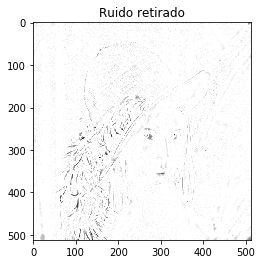

In [7]:
plt.imshow(lena_filtered - lena_gray, cmap="gray")
plt.title("Ruido retirado")

Text(0.5,1,'Filtrada')

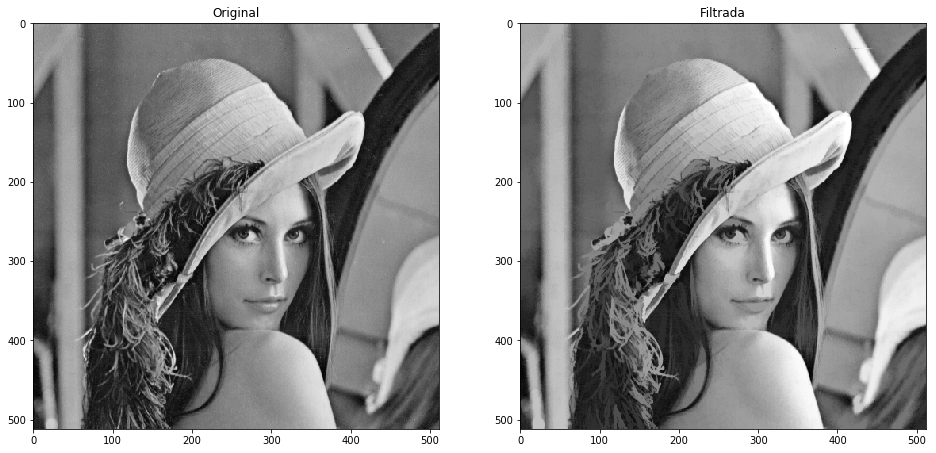

In [8]:
plt.figure(figsize=(16,18))

plt.subplot(1, 2, 1)
plt.imshow(lena_gray, cmap="gray", )
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(lena_filtered, cmap="gray")
plt.title("Filtrada")